<a href="https://colab.research.google.com/github/Shahidshaik999/cafe-billing-system-using-python/blob/main/Churn2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]
Evaluating models using cross-validation:
Support Vector Machine accuracy: 0.917
Random Forest accuracy: 0.954
K-Nearest Neighbors accuracy: 0.894

Predicted vs True Probability:


,Predicted Probability,Count,True Probability
0,0.00,640,0.029687
1,0.02,604,0.016556
2,0.04,451,0.031042
3,0.06,299,0.023411
4,0.08,216,0.032407


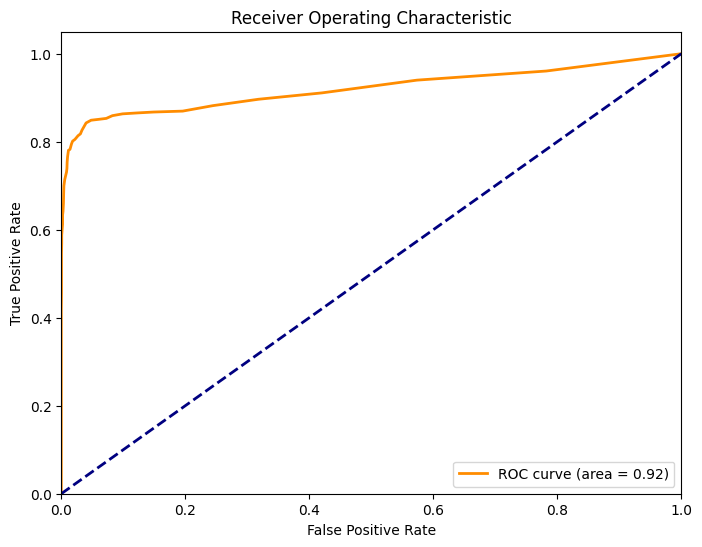

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.957


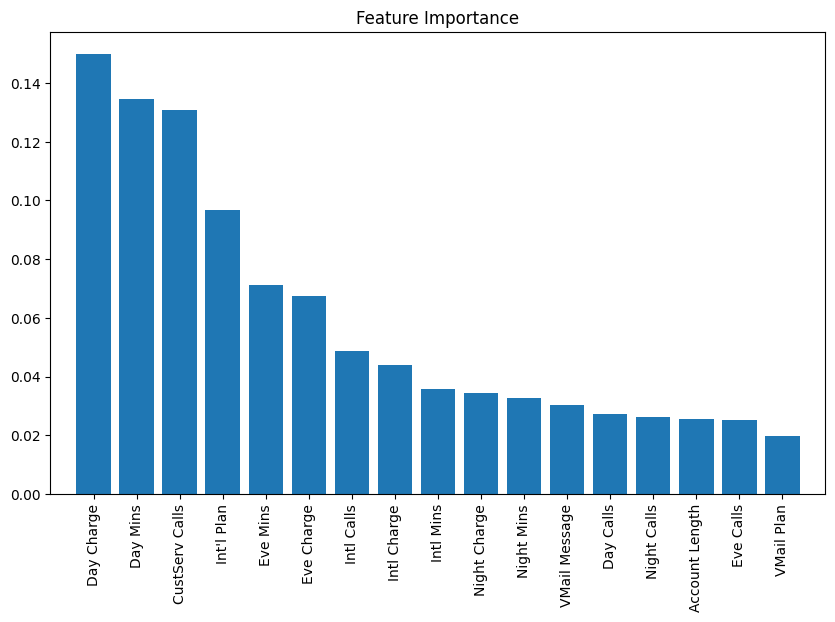

In [ ]:
# Importing necessary libraries
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# Load the dataset
churn_df = pd.read_csv('/content/sample_data/churn.csv')

# Display column names
print("Column names:")
print(churn_df.columns.tolist())

# Display a sample of the data
print("\nSample data:")
display(churn_df.head(6))

# Isolate the target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.', 1, 0)  # Convert target variable to binary

# Drop unnecessary columns
to_drop = ['State', 'Area Code', 'Phone', 'Churn?']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# Convert categorical features to boolean values
yes_no_cols = ["Int'l Plan", "VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Standardize the feature space
X = churn_feat_space.values.astype(float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Display the dimensions of the feature space and the unique target labels
print(f"Feature space holds {X.shape[0]} observations and {X.shape[1]} features")
print("Unique target labels:", np.unique(y))

# Function to run cross-validation for a given classifier
def run_cv(X, y, clf_class, **kwargs):
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = np.zeros(len(y))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Running cross-validation with different classifiers
print("Evaluating models using cross-validation:")

svc_acc = accuracy(y, run_cv(X, y, SVC))
print(f"Support Vector Machine accuracy: {svc_acc:.3f}")

rf_acc = accuracy(y, run_cv(X, y, RF))
print(f"Random Forest accuracy: {rf_acc:.3f}")

knn_acc = accuracy(y, run_cv(X, y, KNN))
print(f"K-Nearest Neighbors accuracy: {knn_acc:.3f}")

# Function to run cross-validation and return probabilities for ROC curve
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(n_splits=5, shuffle=True)
    y_prob = np.zeros((len(y), 2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

# Running cross-validation with probability estimates
pred_prob = run_prob_cv(X, y, RF, n_estimators=50)
pred_churn = pred_prob[:, 1]
is_churn = y == 1

# Calculating predicted probabilities and true probabilities
counts = pd.value_counts(pred_churn)
true_prob = {prob: np.mean(is_churn[pred_churn == prob]) for prob in counts.index}
true_prob = pd.Series(true_prob)

# Combine counts and true probabilities for display
counts = pd.concat([counts, true_prob], axis=1).reset_index()
counts.columns = ['Predicted Probability', 'Count', 'True Probability']

# Display the results
print("\nPredicted vs True Probability:")
display(counts.head())

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y, pred_churn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning using GridSearchCV for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RF()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

# Final model with best parameters
final_rf = grid_search.best_estimator_
final_rf.fit(X, y)

# Feature Importance Visualization
importances = final_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), churn_feat_space.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
